# 8. Cleaning up Tweets by Using Twitter API v1.1 with Python

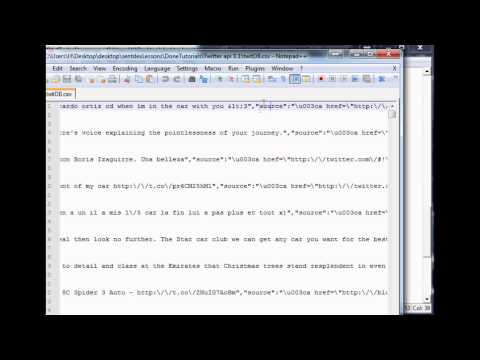

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('AtqqVXZ365g')

## 8.1 Saving tweets into a csv file.

In [ ]:
import time
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

# Consumer key
ckey = 'xxxxxxxx'
# Consumer secret
csecret = 'xxxxxxxx'
# Access token
atoken = 'xxxxxxxx'
# Access token secret
asecret = 'xxxxxxxx'

class listener(StreamListener):
    
    def on_data(self, data):
        try:
            print(data)
            saveFile = open('tweetDB.csv', 'a')
            saveFile.write(data)
            saveFile.write('\n')
            saveFile.close()
            return True
        except BaseException as e:
            print('failed on_data,', str(e))
            time.sleep(5)
    
    def on_error(self, status):
        print(status)
        
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["car"])

## 8.2 Cleaning up tweets before saving them.

In [ ]:
import json
import time
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

# Consumer key
ckey = 'xxxxxxxx'
# Consumer secret
csecret = 'xxxxxxxx'
# Access token
atoken = 'xxxxxxxx'
# Access token secret
asecret = 'xxxxxxxx'

class listener(StreamListener):
    
    def on_data(self, data):
        try:
            #print(data)
            
            all_data = json.loads(data)
            tweet = all_data["text"]
            username = all_data["user"]["screen_name"]
            
            print(tweet)
            
            saveThis = str(time.time()) + '::' + username + '::' + tweet
            saveThis.encode('utf-8')
            
            saveFile = open('tweetDB2.csv', 'a')
            saveFile.write(saveThis)
            saveFile.write('\n')
            saveFile.close()
            return True
        except BaseException as e:
            print('failed on_data,', str(e))
            time.sleep(5)
    
    def on_error(self, status):
        print(status)
        
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["car"])

## 8.3 Saving tweets into a MySQL database.

In [1]:
import json
import MySQLdb
import time
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

# Configuration for the local MySQL server:
# The default socket /tmp/mysql.sock doesn't exist and we haven't found a way of 
# setting it to the correct value, so we have to specify it in the connect() call. 
# Also, to work around the socket issue, we may specify the host as "127.0.0.1", 
# but it will force the client to connect to the MySQL server via TCP/IP, which is 
# in general slower than "localhost" via UNIX domain socket.
socketFile = '/var/run/mysqld/mysqld.sock' 
host = "localhost"
username = "root"
password = "xxxxxxxx"
dbname = "tutorial"

conn = MySQLdb.connect(
    unix_socket = socketFile,
    host = host, 
    user = username, 
    passwd = password, 
    db = dbname)
cur = conn.cursor()

# To work with foreign characters, use UTF-8 encoding.
# Also run the following commands in MySQL.
# mysql> SET NAMES utf8mb4;
# mysql> ALTER DATABASE tutorial CHARACTER SET = utf8mb4 COLLATE = utf8mb4_general_ci;
# Then verify the change in MySQL.
# mysql> SHOW VARIABLES WHERE Variable_name LIKE 'character\_set\_%' OR Variable_name LIKE 'collation%';
conn.set_character_set('utf8mb4')
cur.execute('SET NAMES utf8mb4;')
cur.execute('SET CHARACTER SET utf8mb4;')
#cur.execute('SET character_set_connection=utf8mb4;')

# Consumer key
ckey = 'xxxxxxxx'
# Consumer secret
csecret = 'xxxxxxxx'
# Access token
atoken = 'xxxxxxxx'
# Access token secret
asecret = 'xxxxxxxx'

class listener(StreamListener):
    
    def on_data(self, data):
        try:
            #print(data)
            
            all_data = json.loads(data)
            tweet = all_data["text"]
            username = all_data["user"]["screen_name"]
            
            cur.execute("INSERT INTO taula (time, username, tweet) VALUES (%s, %s, %s)",
                (time.time(), username, tweet))
            
            conn.commit()
            
            print((username, tweet))
            
            return True
        except BaseException as e:
            print('failed on_data,', str(e))
            time.sleep(5)
    
    def on_error(self, status):
        print(status)
        
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["car"])

('xoSyasyaNiwaa', 'RT @Jdxthompson: i’m such a “wait don’t get out of the car yet, this is a good song” type of person')
('nicolealexiss_', 'i want a cool car that i can post cool pics of')
('royceignoresme', 'Soy un poco sarcástica. Y muy rara con mis amigxs... Ha #ArtistaDelFestivalPrinceRoyce https://t.co/8HOBS6sJs1')
('laexgirasoles', 'RT @adrianalpmqlp: #MiercolesIntratable  Hugo Moyano en carácter de que convoca? si no es mas secretario general de la CGT, no es mas secre…')
('flawstae', 'RT @glitter_jk: So K-ARMY witnessed RM and JK together in Soon-Cheon the same day of RM photo. To get there by car from Seoul takes about 3…')
('imanmolpednekar', '@MumbaiPolice @CPMumbaiPolice Are private vehicles allowed to put Police plate on display inside the car? https://t.co/Bkthor3Dvw')
('vaneshythap', 'RT @jamesmaslow: I sing in the kitchen sitting on my kitchen island. I sing in the shower. I sing in my car. On… https://t.co/JqlygquF2g')
('Lglinh203', 'RT @glitter_jk: So K-ARMY witnesse

KeyboardInterrupt: 